# **Classification | Emotion Recognition in Speech**

## **Load packages**

In [43]:
!pip install lightgbm
!pip install catboost
!pip install pytorch_tabnet
!pip install deepctr


DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


  Using cached deepctr-0.9.3-py3-none-any.whl.metadata (13 kB)
  Using cached h5py-3.7.0.tar.gz (392 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Using cached deepctr-0.9.3-py3-none-any.whl (141 kB)
Failed to build h5py


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [544 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-312\h5py
  copying h5py\h5py_warnings.py -> build\lib.win-amd64-cpython-312\h5py
  copying h5py\ipy_completer.py -> build\lib.win-amd64-cpython-312\h5py
  copying h5py\version.py -> build\lib.win-amd64-cpython-312\h5py
  copying h5py\__init__.py -> build\lib.win-amd64-cpython-312\h5py
  creating build\lib.win-amd64-cpython-312\h5py\_hl
  copying h5py\_hl\attrs.py -> build\lib.win-amd64-cpython-312\h5py\_hl
  copying h5py\_hl\base.py -> build\lib.win-amd64-cpython-312\h5py\_hl
  copying h5py\_hl\compat.py -> build\lib.win-amd64-cpython-312\h5py\_hl
  copying h5py\_hl\dataset.py -> build\lib.win-amd64-cpython-312\h5py\_hl
  copying h5py\_hl\datatype.py -> build\lib.win-amd64-cpython-312\h5py\_hl
  copying h5py\_hl\dims.py -> build\lib.win-amd64-cpython-312\h5py\_hl
  copying h5py\_hl\files.py -> build\lib.win-am

In [5]:
import pandas as pd
import os
import shutil
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns


## **Load datasets**

## **Useful functions**

In [3]:
def rename_files(directories: list[str]):

    """

    Description:
        This function renames files, adding the "author_##" and keeping the id of the video

    Args:
        directories (list[str]): array of str, where each str is the local path to a directory, these directories contain videos .mp4
    
    """

    print("Starting renaming process...\n")

    for directory in directories:

        print(f"Renaming process for {directory} started.")
        
        for filename in os.listdir(directory): # archives inside of the curret directory
            if filename.endswith(".wav"): # if the file is a video with an _

                id = filename.split("_")[-1] # extract just the id
                new_filename = f"{directory.split("/")[-1]}_{id}" # concat just the id w '.mp4'

                old_file = os.path.join(directory, filename) # path to the old file
                new_file = os.path.join(directory, new_filename) # path to the new file

                os.rename(old_file, new_file) # rename videos w just its id
        
        print(f"Renaming process for {directory} completed.")

In [10]:

def write_audio_paths_txt(directories: list[str], path: list[str]):

    """

    Description:
        This function renames files, just keeping the id of the video

    Args:
        directories (list[str]): array of str, where each str is the local path to a directory, these directories contain videos .mp4
    
    """

    print("Starting renaming process...\n")

    paths = []

    for directory in range (len(directories)):

        print(f"Writing process for {directories[directory]} started.")
        
        for filename in os.listdir(directories[directory]): # archives inside of the curret directory
            if filename.endswith(".wav"): # if the file is a video with an _

                name = filename # extract just the id
                paths.append(os.path.join(path[directory], f"{name}")) # append the id to the array

    print(paths)

    output_file = f'./txt/paths.txt'
    with open(output_file, 'w') as f:
        for path in paths:
            f.write(f"{path}\n")
        

You can change the location according to your paths

In [11]:
directories = [f'./archive/Actor_{i:02d}' for i in range(1, 25)]
paths = [f'D:/UTEC/IA/PROYECTO3/emotion-recognition-in-speech/archive/Actor_{i:02d}/' for i in range(1, 25)]

In [12]:
os.makedirs("txt", exist_ok=True)

rename_files(directories)

Starting renaming process...

Renaming process for ./archive/Actor_01 started.
Renaming process for ./archive/Actor_01 completed.
Renaming process for ./archive/Actor_02 started.
Renaming process for ./archive/Actor_02 completed.
Renaming process for ./archive/Actor_03 started.
Renaming process for ./archive/Actor_03 completed.
Renaming process for ./archive/Actor_04 started.
Renaming process for ./archive/Actor_04 completed.
Renaming process for ./archive/Actor_05 started.
Renaming process for ./archive/Actor_05 completed.
Renaming process for ./archive/Actor_06 started.
Renaming process for ./archive/Actor_06 completed.
Renaming process for ./archive/Actor_07 started.
Renaming process for ./archive/Actor_07 completed.
Renaming process for ./archive/Actor_08 started.
Renaming process for ./archive/Actor_08 completed.
Renaming process for ./archive/Actor_09 started.
Renaming process for ./archive/Actor_09 completed.
Renaming process for ./archive/Actor_10 started.
Renaming process for 

In [13]:
write_audio_paths_txt(directories, paths)

Starting renaming process...

Writing process for ./archive/Actor_01 started.
Writing process for ./archive/Actor_02 started.
Writing process for ./archive/Actor_03 started.
Writing process for ./archive/Actor_04 started.
Writing process for ./archive/Actor_05 started.
Writing process for ./archive/Actor_06 started.
Writing process for ./archive/Actor_07 started.
Writing process for ./archive/Actor_08 started.
Writing process for ./archive/Actor_09 started.
Writing process for ./archive/Actor_10 started.
Writing process for ./archive/Actor_11 started.
Writing process for ./archive/Actor_12 started.
Writing process for ./archive/Actor_13 started.
Writing process for ./archive/Actor_14 started.
Writing process for ./archive/Actor_15 started.
Writing process for ./archive/Actor_16 started.
Writing process for ./archive/Actor_17 started.
Writing process for ./archive/Actor_18 started.
Writing process for ./archive/Actor_19 started.
Writing process for ./archive/Actor_20 started.
Writing pr

Ahora que tenemos todos los path de los videos almacenados en un `.txt` (separado por train, val y test) podemos usar video_features para realizar la extracción de caracteristicas correspondiente.

Para esto primero clonamos el repositorio de video_features e instalamos las dependencias necesarias dentro de este directorio/repositorio:

```bash
git clone https://github.com/v-iashin/video_features.git
cd video_features

Para realizar la instalación de dependencias, necesitas tener anaconda/miniconda instalado

```bash
conda create -n video_features
conda install pytorch torchvision torchaudio pytorch-cuda=12.1 -c pytorch -c nvidia
conda install -c conda-forge omegaconf scipy tqdm pytest opencv
conda install -c conda-forge av

Con esto hecho, ya se puede realizar la extracción de caracteristicas en la terminal con el siguiente comando:

```bash

python main.py 
        \ feature_type=vggish
        \ device="cuda:0" 
        \ file_with_video_paths="../txt/paths.txt" 
        \ on_extraction=save_numpy 
        \ output_path="../extraction"

# 'name' could be: [train, test, val]

Ejecutando lo anterior, se crean archivos `.npy` dentro del directorio 'videos'. Cada archivo le corresponde a la extracción de características de un video.

# Preparacion de los datos

## Identificación de shapes en los archivos npy
Se realiza la identificación de los shapes que se forman luego de obtener las caracteristicas de los videos, para encontrar la diferencia de los mismos y se pueda trabajar con una misma dimensionalidad en todos los videos

In [46]:
import os
import numpy as np
from collections import Counter

# Ruta de la carpeta donde están los archivos npy
data_folder = "./extraction/vggish/"

# Obtener la lista de archivos .npy en la carpeta
npy_files = [f for f in os.listdir(data_folder) if f.endswith(".npy")]

# Diccionario para almacenar las formas
shape_counter = Counter()

# Cargar los archivos y contar las formas
for file in npy_files:
    file_path = os.path.join(data_folder, file)
    data = np.load(file_path)
    shape_counter[data.shape] += 1

# Mostrar el conteo de formas únicas
print("Conteo de formas de los archivos .npy:")
for shape, count in shape_counter.items():
    print(f"Forma: {shape} -> Cantidad: {count}")


Conteo de formas de los archivos .npy:
Forma: (3, 128) -> Cantidad: 1054
Forma: (4, 128) -> Cantidad: 379
Forma: (5, 128) -> Cantidad: 7


## Agregar el label
Se agrega el label correspondiente a la emoción para hacer el entrenamiento de los datos y su clasificación, no se modifica los archivos originales de extraction para mantenerlos sin modificaciones y poder utilizarlos para futuros

In [47]:
import os
import numpy as np
import pandas as pd

# Ruta donde están los archivos .npy
data_folder = "./extraction/vggish/"
output_folder = "./label_added_npy/"

# Crear carpeta si no existe
os.makedirs(output_folder, exist_ok=True)

# Diccionario de emociones según el código en el nombre del archivo
emotion_dict = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# Obtener la lista de archivos .npy
npy_files = [f for f in os.listdir(data_folder) if f.endswith(".npy")]

# Procesar archivos
for file in npy_files:
    parts = file.split('_')  # Separar por guiones bajos "_"
    
    if len(parts) >= 3:  # Asegurar que tiene suficiente estructura
        emotion_code = parts[2].split('-')[2]  # Obtener el cuarto grupo (emoción)
        emotion = emotion_dict.get(emotion_code, "unknown")  # Buscar en el diccionario
        
        # Cargar datos del archivo npy
        data = np.load(os.path.join(data_folder, file))

        # Guardar nuevo archivo con la etiqueta incluida como diccionario
        output_path = os.path.join(output_folder, file)
        np.save(output_path, {"data": data, "label": emotion})

print(f"Archivos transformados guardados en: {output_folder}")


Archivos transformados guardados en: ./label_added_npy/


## Separación por shapes
Se crea una carpeta diferente para cada shape y se guarda cada video en su respectivo folder con su shape indicado para realizar un trabajo más eficiente con los datos

In [48]:
import os
import shutil
import numpy as np
from collections import defaultdict

# Ruta de la carpeta donde están los archivos npy con label incluido
data_folder = "./label_added_npy"
output_folder = "./datasets_by_shape/"

# Crear la carpeta de salida si no existe
os.makedirs(output_folder, exist_ok=True)

# Obtener la lista de archivos .npy en la carpeta
npy_files = [f for f in os.listdir(data_folder) if f.endswith(".npy")]

# Diccionario para agrupar archivos por forma
shape_dict = defaultdict(list)

# Cargar los archivos y organizarlos por forma
for file in npy_files:
    file_path = os.path.join(data_folder, file)
    
    # Cargar el archivo con allow_pickle=True porque ahora es un diccionario
    loaded_data = np.load(file_path, allow_pickle=True).item()
    
    # Acceder a la parte de los datos
    data_array = loaded_data["data"]
    
    # Agrupar por forma
    shape_dict[data_array.shape].append(file_path)

# Copiar los archivos en su respectiva carpeta
for shape, files in shape_dict.items():
    shape_folder = os.path.join(output_folder, f"shape_{'_'.join(map(str, shape))}")
    os.makedirs(shape_folder, exist_ok=True)

    for file_path in files:
        filename = os.path.basename(file_path)
        destination_path = os.path.join(shape_folder, filename)
        shutil.copy(file_path, destination_path)

    print(f"Copiados {len(files)} archivos en: {shape_folder}")


Copiados 1054 archivos en: ./datasets_by_shape/shape_3_128
Copiados 379 archivos en: ./datasets_by_shape/shape_4_128
Copiados 7 archivos en: ./datasets_by_shape/shape_5_128


## Separacion en training y testing para cada uno de los Shapes
Al momento de crear cada uno de los grupos e shapes, separamos cada grupo de datos en los training y testing para poder entrenar el modelo con informacion clara diferenciandose por las emociones y asegurandonos tener data de cada emocion

In [49]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

# Ruta de la carpeta donde están los archivos organizados por forma
base_folder = "./datasets_by_shape/"

# Recorrer todas las carpetas de forma
for shape_folder in os.listdir(base_folder):
    shape_path = os.path.join(base_folder, shape_folder)
    
    if not os.path.isdir(shape_path):  # Saltar archivos que no sean carpetas
        continue

    # Crear nueva carpeta de salida con el prefijo "training_"
    new_folder = os.path.join(base_folder, f"training_{shape_folder}")
    os.makedirs(new_folder, exist_ok=True)

    # Crear subcarpetas train y test dentro de la nueva carpeta
    train_folder = os.path.join(new_folder, "train")
    val_folder = os.path.join(new_folder, "test")
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(val_folder, exist_ok=True)

    # Obtener todos los archivos npy en la carpeta actual
    npy_files = [f for f in os.listdir(shape_path) if f.endswith(".npy")]

    # Diccionario para agrupar archivos por etiqueta
    label_dict = {}

    # Leer las etiquetas de cada archivo
    for file in npy_files:
        file_path = os.path.join(shape_path, file)
        loaded_data = np.load(file_path, allow_pickle=True).item()
        label = loaded_data["label"]  # Obtener la etiqueta del diccionario

        if label not in label_dict:
            label_dict[label] = []
        
        label_dict[label].append(file_path)

    # Dividir cada grupo en 70% train y 30% test (si hay más de 1 archivo)
    for label, files in label_dict.items():
        if len(files) == 1:
            # Si solo hay un archivo, copiarlo a train directamente
            shutil.copy(files[0], os.path.join(train_folder, os.path.basename(files[0])))
        else:
            # Si hay más de 1 archivo, dividirlo normalmente
            train_files, val_files = train_test_split(files, test_size=0.3, random_state=42)

            for file_path in train_files:
                shutil.copy(file_path, os.path.join(train_folder, os.path.basename(file_path)))

            for file_path in val_files:
                shutil.copy(file_path, os.path.join(val_folder, os.path.basename(file_path)))

    print(f"División completada para {shape_folder}")


División completada para shape_3_128
División completada para shape_4_128
División completada para shape_5_128


# Analisis de datos

In [6]:
import os
import numpy as np
import pandas as pd

# Ruta específica donde están los archivos de entrenamiento y test
shape_folder = "./datasets_by_shape/training_shape_3_128/"

# Verificar si la carpeta existe
if not os.path.exists(shape_folder):
    raise FileNotFoundError(f"La carpeta {shape_folder} no existe.")

# Obtener rutas de train y test
train_folder = os.path.join(shape_folder, "train")
test_folder = os.path.join(shape_folder, "test")

# Listas para almacenar los datos
train_data = []
test_data = []

# Función para cargar datos de cada archivo
def load_npy_data(file_path):
    loaded_data = np.load(file_path, allow_pickle=True).item()
    return {
        "label": loaded_data["label"],
        "data": loaded_data["data"]  # Guardar los datos directamente
    }

# Procesar archivos de entrenamiento
if os.path.exists(train_folder):
    for file in os.listdir(train_folder):
        if file.endswith(".npy"):
            file_path = os.path.join(train_folder, file)
            train_data.append(load_npy_data(file_path))

# Procesar archivos de test
if os.path.exists(test_folder):
    for file in os.listdir(test_folder):
        if file.endswith(".npy"):
            file_path = os.path.join(test_folder, file)
            test_data.append(load_npy_data(file_path))

# Crear DataFrames con toda la información de los archivos .npy
df_train = pd.DataFrame(train_data)
df_test = pd.DataFrame(test_data)

# Mostrar los DataFrames
print("Train DataFrame:")
print(df_train.head())

print("\nTest DataFrame:")
print(df_test.head())

# Opcional: Guardar en CSV (sin la columna 'datos' porque no se puede guardar arrays en CSV)
# df_train.drop(columns=["datos"]).to_csv("train_data_shape_3_128.csv", index=False)
# df_test.drop(columns=["datos"]).to_csv("test_data_shape_3_128.csv", index=False)


Train DataFrame:
     label                                               data
0  neutral  [[0.0, 0.0071444213, 0.04943618, 0.4735687, 0....
1  neutral  [[0.0, 0.0, 0.0, 0.3059488, 0.0, 0.0, 0.0, 0.0...
2  neutral  [[0.0, 0.06418693, 0.0, 0.37046093, 0.00514887...
3     calm  [[0.0, 0.0, 0.0, 0.2987757, 0.0, 0.0, 0.0, 0.0...
4     calm  [[0.0, 0.031283736, 0.0, 0.37972167, 0.0329176...

Test DataFrame:
     label                                               data
0  neutral  [[0.0, 0.0, 0.0, 0.388049, 0.0, 0.0, 0.0, 0.0,...
1     calm  [[0.0, 0.0, 0.0, 0.30296177, 0.0, 0.0, 0.0, 0....
2     calm  [[0.0, 0.0, 0.0, 0.30425185, 0.0, 0.0, 0.0, 0....
3      sad  [[0.0, 0.0, 0.0, 0.35273558, 0.0, 0.0, 0.0, 0....
4    angry  [[0.0, 0.13938579, 0.14799513, 0.37255418, 0.0...


In [7]:
df_train

,label,data
0,neutral,"[[0.0, 0.0071444213, 0.04943618, 0.4735687, 0...."
1,neutral,"[[0.0, 0.0, 0.0, 0.3059488, 0.0, 0.0, 0.0, 0.0..."
2,neutral,"[[0.0, 0.06418693, 0.0, 0.37046093, 0.00514887..."
3,calm,"[[0.0, 0.0, 0.0, 0.2987757, 0.0, 0.0, 0.0, 0.0..."
4,calm,"[[0.0, 0.031283736, 0.0, 0.37972167, 0.0329176..."
...,...,...
730,surprised,"[[0.0, 0.0, 0.0, 0.29589912, 0.0, 0.0, 0.0, 0...."
731,surprised,"[[0.0, 0.0, 0.008012325, 0.3469377, 0.00813886..."
732,surprised,"[[0.042180568, 0.0, 0.16838118, 0.005011173, 0..."
733,surprised,"[[0.0, 0.0, 0.19817317, 0.1082742, 0.0, 0.0, 0..."


In [8]:
df_test

,label,data
0,neutral,"[[0.0, 0.0, 0.0, 0.388049, 0.0, 0.0, 0.0, 0.0,..."
1,calm,"[[0.0, 0.0, 0.0, 0.30296177, 0.0, 0.0, 0.0, 0...."
2,calm,"[[0.0, 0.0, 0.0, 0.30425185, 0.0, 0.0, 0.0, 0...."
3,sad,"[[0.0, 0.0, 0.0, 0.35273558, 0.0, 0.0, 0.0, 0...."
4,angry,"[[0.0, 0.13938579, 0.14799513, 0.37255418, 0.0..."
...,...,...
314,neutral,"[[0.0, 0.0, 0.0, 0.3042508, 0.0, 0.0, 0.0, 0.0..."
315,calm,"[[0.0, 0.009363666, 0.0, 0.33448198, 0.0, 0.0,..."
316,happy,"[[0.0, 0.0067652464, 0.0, 0.2886968, 0.0, 0.0,..."
317,happy,"[[0.0, 0.0, 0.23030907, 0.23498112, 0.0, 0.0, ..."


In [9]:
df_train["label"]

0        neutral
1        neutral
2        neutral
3           calm
4           calm
         ...    
730    surprised
731    surprised
732    surprised
733    surprised
734    surprised
Name: label, Length: 735, dtype: object

In [10]:
X_train = df_train["data"]
y_train = df_train["label"]
X_test  = df_test["data"]
y_test  = df_test["label"]

In [11]:
X_train[0]

array([[0.        , 0.00714442, 0.04943618, 0.4735687 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.07443761, 0.0946748 , 0.2840199 , 0.        ,
        0.12775272, 0.        , 0.        , 0.18548256, 0.18819414,
        0.15326704, 0.        , 0.        , 0.3294351 , 0.06047138,
        0.        , 0.        , 0.        , 0.5089902 , 0.46082583,
        0.        , 0.        , 0.43119812, 0.        , 0.        ,
        0.37710682, 0.        , 0.03477397, 0.05049854, 0.4855451 ,
        0.        , 0.54971135, 0.3974748 , 0.9383247 , 0.3459052 ,
        0.        , 0.        , 0.        , 0.        , 0.40755463,
        0.08986305, 0.        , 0.        , 0.31692883, 0.15315957,
        0.3301512 , 0.14662343, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.39344704, 0.        , 0.06256111,
        0.03101302, 0.0922485 , 0.        , 0.12

In [12]:
y_train

0        neutral
1        neutral
2        neutral
3           calm
4           calm
         ...    
730    surprised
731    surprised
732    surprised
733    surprised
734    surprised
Name: label, Length: 735, dtype: object

In [13]:
X_train_flattened = np.array([x.flatten() for x in X_train])
X_test_flattened = np.array([x.flatten() for x in X_test])

In [14]:
len(X_train_flattened)

735

In [15]:
len(X_test_flattened)

319

In [16]:
from sklearn.preprocessing import LabelEncoder

# Inicializar LabelEncoder
label_encoder = LabelEncoder()

# Transformar etiquetas a valores numéricos
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Comprobar transformación
print("Ejemplo de etiquetas originales:", y_train[:5])
print("Ejemplo de etiquetas numéricas:", y_train_encoded[:5])

Ejemplo de etiquetas originales: 0    neutral
1    neutral
2    neutral
3       calm
4       calm
Name: label, dtype: object
Ejemplo de etiquetas numéricas: [5 5 5 1 1]


In [35]:
label_encoder.inverse_transform([2, 4, 1, 3, 2])


array(['disgust', 'happy', 'calm', 'fearful', 'disgust'], dtype=object)

Accuracy: 0.44
F1 Score: 0.43


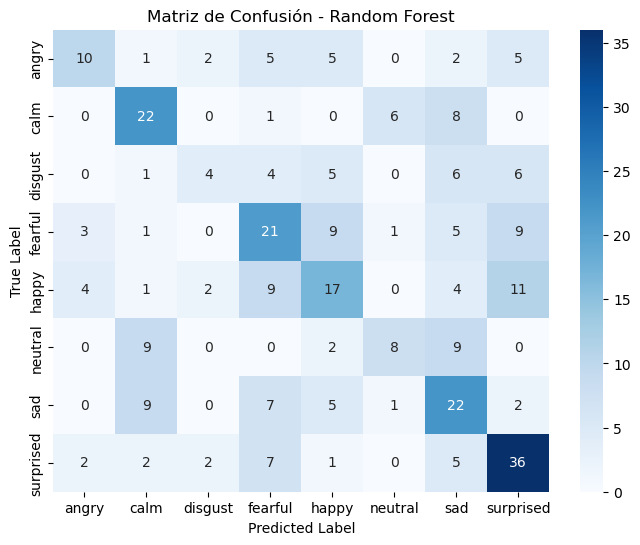

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenar el modelo de Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_flattened, y_train_encoded)

# Predecir en test
y_pred = clf.predict(X_test_flattened)

# Calcular métricas
accuracy = accuracy_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

# Crear matriz de confusión
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Mostrar métricas
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

# Graficar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusión - Random Forest")
plt.show()


📌 SVM - Accuracy: 0.48
📌 SVM - F1 Score: 0.48


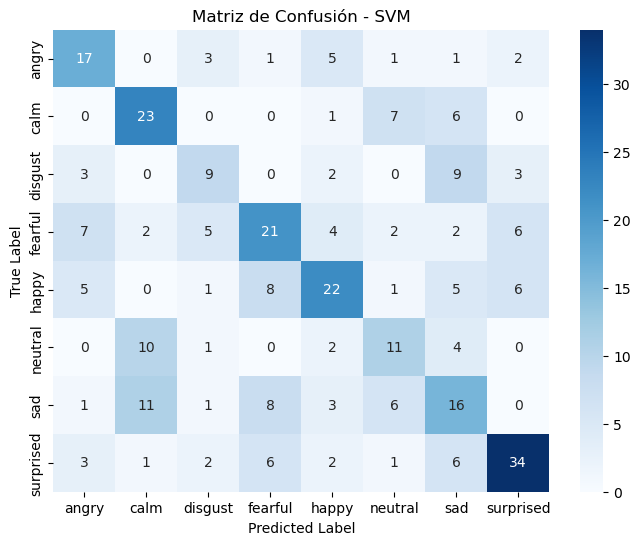

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenar el modelo SVM
clf_svm = SVC(kernel="linear", random_state=42)
clf_svm.fit(X_train_flattened, y_train_encoded)

# Predecir en test
y_pred_svm = clf_svm.predict(X_test_flattened)

# Calcular métricas
accuracy_svm = accuracy_score(y_test_encoded, y_pred_svm)
f1_svm = f1_score(y_test_encoded, y_pred_svm, average='weighted')

# Crear matriz de confusión
conf_matrix_svm = confusion_matrix(y_test_encoded, y_pred_svm)

# Mostrar métricas
print(f"📌 SVM - Accuracy: {accuracy_svm:.2f}")
print(f"📌 SVM - F1 Score: {f1_svm:.2f}")

# Graficar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusión - SVM")
plt.show()


📌 KNN - Accuracy: 0.40
📌 KNN - F1 Score: 0.40


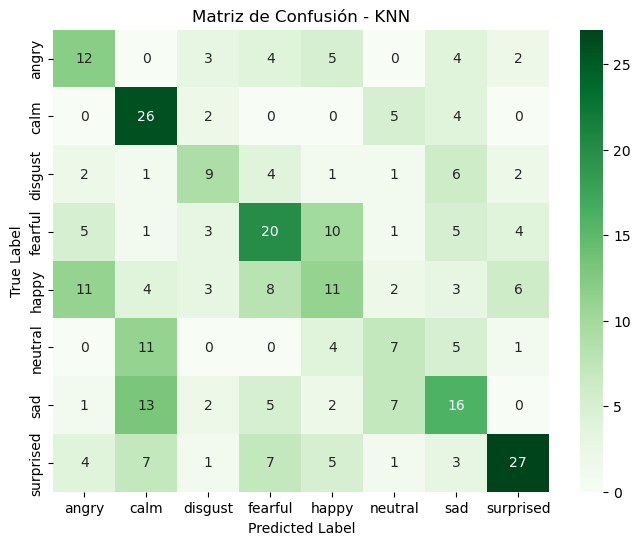

In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Entrenar el modelo KNN
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train_flattened, y_train_encoded)

# Predecir en test
y_pred_knn = clf_knn.predict(X_test_flattened)

# Calcular métricas
accuracy_knn = accuracy_score(y_test_encoded, y_pred_knn)
f1_knn = f1_score(y_test_encoded, y_pred_knn, average='weighted')

# Crear matriz de confusión
conf_matrix_knn = confusion_matrix(y_test_encoded, y_pred_knn)

# Mostrar métricas
print(f"📌 KNN - Accuracy: {accuracy_knn:.2f}")
print(f"📌 KNN - F1 Score: {f1_knn:.2f}")

# Graficar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Greens", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusión - KNN")
plt.show()


📌 Gradient Boosting - Accuracy: 0.42
📌 Gradient Boosting - F1 Score: 0.41


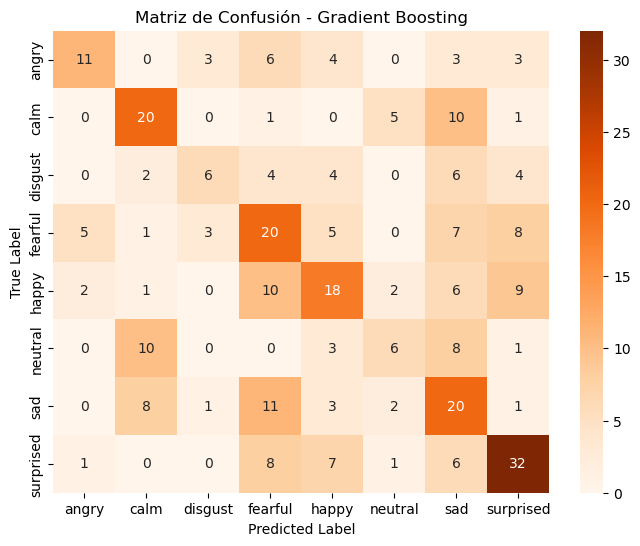

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenar el modelo Gradient Boosting
clf_gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
clf_gbm.fit(X_train_flattened, y_train_encoded)

# Predecir en test
y_pred_gbm = clf_gbm.predict(X_test_flattened)

# Calcular métricas
accuracy_gbm = accuracy_score(y_test_encoded, y_pred_gbm)
f1_gbm = f1_score(y_test_encoded, y_pred_gbm, average='weighted')

# Crear matriz de confusión
conf_matrix_gbm = confusion_matrix(y_test_encoded, y_pred_gbm)

# Mostrar métricas
print(f"📌 Gradient Boosting - Accuracy: {accuracy_gbm:.2f}")
print(f"📌 Gradient Boosting - F1 Score: {f1_gbm:.2f}")

# Graficar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm, annot=True, fmt="d", cmap="Oranges", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusión - Gradient Boosting")
plt.show()


📌 Naive Bayes - Accuracy: 0.26
📌 Naive Bayes - F1 Score: 0.26


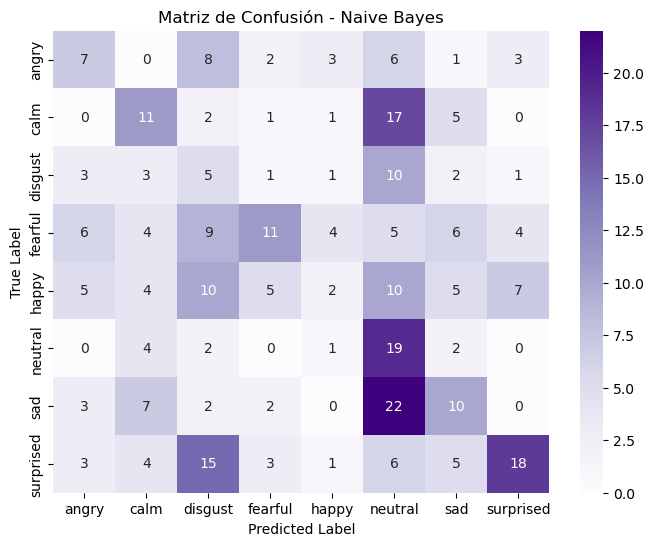

In [43]:
from sklearn.naive_bayes import GaussianNB

# Entrenar el modelo Naive Bayes
clf_nb = GaussianNB()
clf_nb.fit(X_train_flattened, y_train_encoded)

# Predecir en test
y_pred_nb = clf_nb.predict(X_test_flattened)

# Calcular métricas
accuracy_nb = accuracy_score(y_test_encoded, y_pred_nb)
f1_nb = f1_score(y_test_encoded, y_pred_nb, average='weighted')

# Crear matriz de confusión
conf_matrix_nb = confusion_matrix(y_test_encoded, y_pred_nb)

# Mostrar métricas
print(f"📌 Naive Bayes - Accuracy: {accuracy_nb:.2f}")
print(f"📌 Naive Bayes - F1 Score: {f1_nb:.2f}")

# Graficar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Purples", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusión - Naive Bayes")
plt.show()


📌 MLP - Accuracy: 0.50
📌 MLP - F1 Score: 0.50


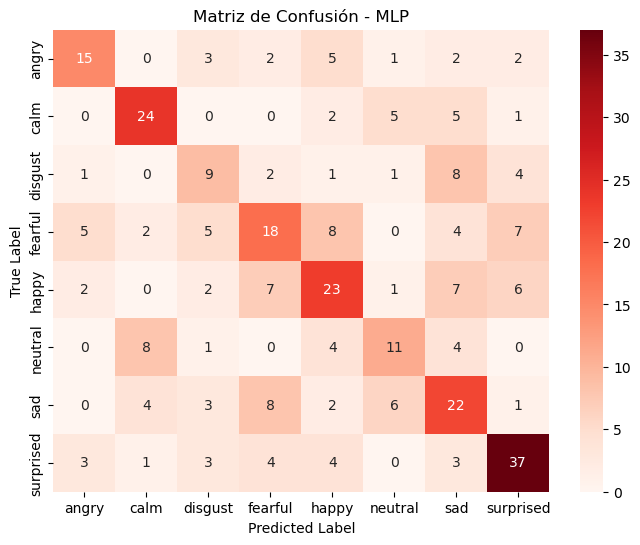

In [44]:
from sklearn.neural_network import MLPClassifier

# Entrenar el modelo MLP
clf_mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, random_state=42)
clf_mlp.fit(X_train_flattened, y_train_encoded)

# Predecir en test
y_pred_mlp = clf_mlp.predict(X_test_flattened)

# Calcular métricas
accuracy_mlp = accuracy_score(y_test_encoded, y_pred_mlp)
f1_mlp = f1_score(y_test_encoded, y_pred_mlp, average='weighted')

# Crear matriz de confusión
conf_matrix_mlp = confusion_matrix(y_test_encoded, y_pred_mlp)

# Mostrar métricas
print(f"📌 MLP - Accuracy: {accuracy_mlp:.2f}")
print(f"📌 MLP - F1 Score: {f1_mlp:.2f}")

# Graficar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt="d", cmap="Reds", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusión - MLP")
plt.show()


📌 Mejor configuración de MLP: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.01, 'solver': 'adam'}
📌 MLP - Accuracy: 0.47
📌 MLP - F1 Score: 0.47


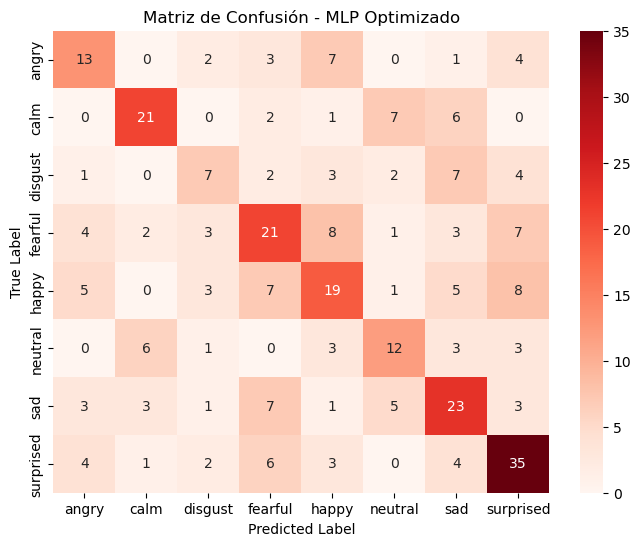

In [46]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Escalar los datos para mejorar el rendimiento de MLP
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flattened)
X_test_scaled = scaler.transform(X_test_flattened)

# Definir hiperparámetros a optimizar
param_grid = {
    "hidden_layer_sizes": [(100,), (100, 50), (128, 64, 32)],  # Diferentes configuraciones de capas ocultas
    "activation": ["relu"],  # Mejor activación para redes profundas
    "solver": ["adam"],  # Adam es mejor para problemas complejos
    "alpha": [0.0001, 0.001, 0.01],  # Regularización L2 para evitar overfitting
    "learning_rate_init": [0.001, 0.005, 0.01]  # Ajuste de tasa de aprendizaje
}

# Usar GridSearch para encontrar los mejores parámetros
clf_mlp = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), param_grid, cv=3, scoring="f1_weighted", n_jobs=-1)
clf_mlp.fit(X_train_scaled, y_train_encoded)

# Mejor modelo encontrado
best_mlp = clf_mlp.best_estimator_

# Predicción con el mejor modelo
y_pred_mlp = best_mlp.predict(X_test_scaled)

# Calcular métricas
accuracy_mlp = accuracy_score(y_test_encoded, y_pred_mlp)
f1_mlp = f1_score(y_test_encoded, y_pred_mlp, average='weighted')

# Crear matriz de confusión
conf_matrix_mlp = confusion_matrix(y_test_encoded, y_pred_mlp)

# Mostrar mejores hiperparámetros
print(f"📌 Mejor configuración de MLP: {clf_mlp.best_params_}")
print(f"📌 MLP - Accuracy: {accuracy_mlp:.2f}")
print(f"📌 MLP - F1 Score: {f1_mlp:.2f}")

# Graficar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt="d", cmap="Reds", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusión - MLP Optimizado")
plt.show()


📌 Mejor configuración de KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
📌 KNN - Accuracy: 0.40
📌 KNN - F1 Score: 0.40


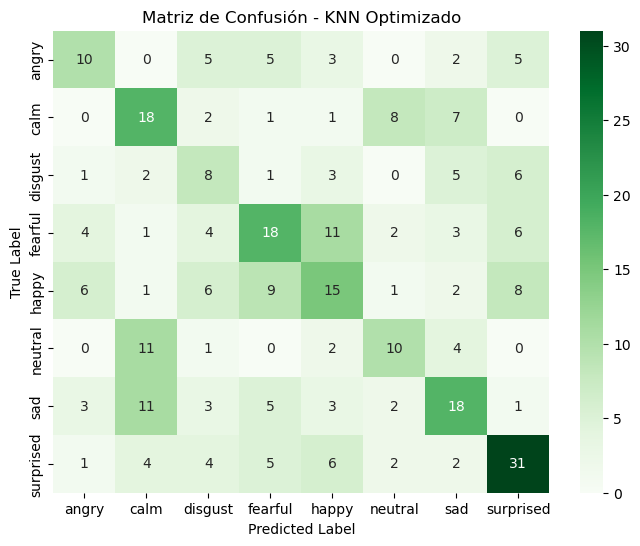

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Escalar los datos para mejorar el rendimiento de KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flattened)
X_test_scaled = scaler.transform(X_test_flattened)

# Definir hiperparámetros a optimizar
param_grid = {
    "n_neighbors": [3, 5, 7, 9],  # Número de vecinos
    "weights": ["uniform", "distance"],  # Cómo ponderar los vecinos
    "metric": ["euclidean", "manhattan", "minkowski"]  # Distancias a probar
}

# Usar GridSearch para encontrar los mejores parámetros
clf_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring="f1_weighted", n_jobs=-1)
clf_knn.fit(X_train_scaled, y_train_encoded)

# Mejor modelo encontrado
best_knn = clf_knn.best_estimator_

# Predicción con el mejor modelo
y_pred_knn = best_knn.predict(X_test_scaled)

# Calcular métricas
accuracy_knn = accuracy_score(y_test_encoded, y_pred_knn)
f1_knn = f1_score(y_test_encoded, y_pred_knn, average='weighted')

# Crear matriz de confusión
conf_matrix_knn = confusion_matrix(y_test_encoded, y_pred_knn)

# Mostrar mejores hiperparámetros
print(f"📌 Mejor configuración de KNN: {clf_knn.best_params_}")
print(f"📌 KNN - Accuracy: {accuracy_knn:.2f}")
print(f"📌 KNN - F1 Score: {f1_knn:.2f}")

# Graficar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Greens", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusión - KNN Optimizado")
plt.show()


📌 Mejor configuración de SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
📌 SVM - Accuracy: 0.44
📌 SVM - F1 Score: 0.43


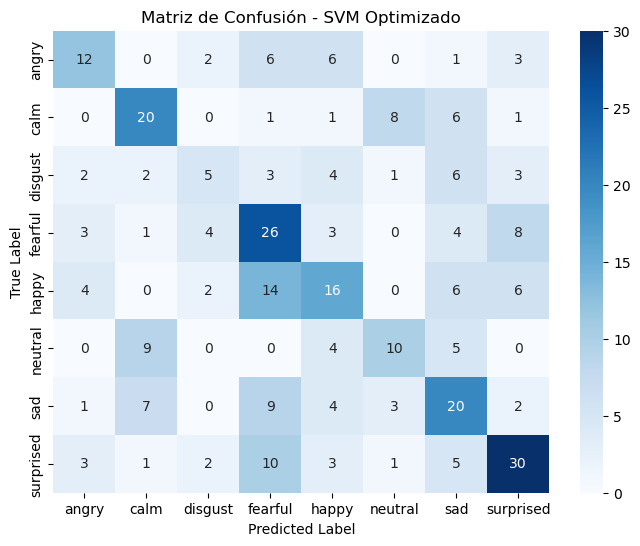

In [48]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Escalar los datos para mejorar el rendimiento de SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flattened)
X_test_scaled = scaler.transform(X_test_flattened)

# Definir hiperparámetros a optimizar
param_grid = {
    "C": [0.1, 1, 10],  # Parámetro de regularización
    "kernel": ["linear", "rbf", "poly"],  # Diferentes funciones núcleo
    "gamma": ["scale", "auto"]  # Solo aplica para RBF y Poly
}

# Usar GridSearch para encontrar los mejores parámetros
clf_svm = GridSearchCV(SVC(), param_grid, cv=3, scoring="f1_weighted", n_jobs=-1)
clf_svm.fit(X_train_scaled, y_train_encoded)

# Mejor modelo encontrado
best_svm = clf_svm.best_estimator_

# Predicción con el mejor modelo
y_pred_svm = best_svm.predict(X_test_scaled)

# Calcular métricas
accuracy_svm = accuracy_score(y_test_encoded, y_pred_svm)
f1_svm = f1_score(y_test_encoded, y_pred_svm, average='weighted')

# Crear matriz de confusión
conf_matrix_svm = confusion_matrix(y_test_encoded, y_pred_svm)

# Mostrar mejores hiperparámetros
print(f"📌 Mejor configuración de SVM: {clf_svm.best_params_}")
print(f"📌 SVM - Accuracy: {accuracy_svm:.2f}")
print(f"📌 SVM - F1 Score: {f1_svm:.2f}")

# Graficar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusión - SVM Optimizado")
plt.show()


📌 Mejor configuración de Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
📌 Random Forest - Accuracy: 0.44
📌 Random Forest - F1 Score: 0.41


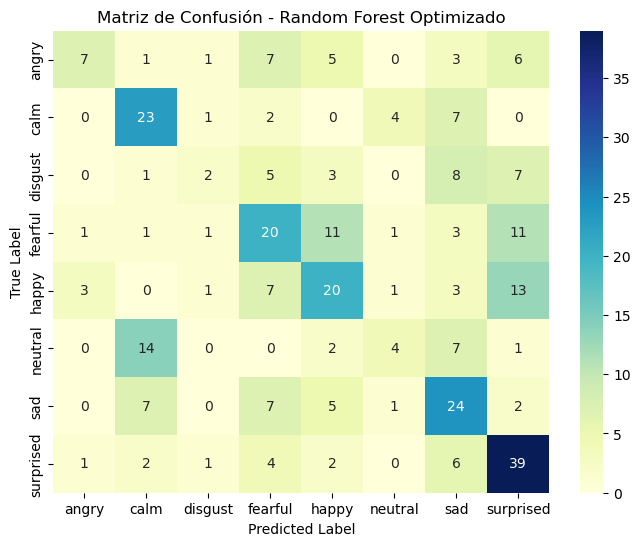

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definir hiperparámetros a optimizar
param_grid = {
    "n_estimators": [50, 100, 200],  # Cantidad de árboles en el bosque
    "max_depth": [None, 10, 20],  # Profundidad máxima del árbol
    "min_samples_split": [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    "min_samples_leaf": [1, 2, 4]  # Mínimo de muestras en una hoja
}

# Usar GridSearch para encontrar los mejores parámetros
clf_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring="f1_weighted", n_jobs=-1)
clf_rf.fit(X_train_flattened, y_train_encoded)

# Mejor modelo encontrado
best_rf = clf_rf.best_estimator_

# Predicción con el mejor modelo
y_pred_rf = best_rf.predict(X_test_flattened)

# Calcular métricas
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
f1_rf = f1_score(y_test_encoded, y_pred_rf, average='weighted')

# Crear matriz de confusión
conf_matrix_rf = confusion_matrix(y_test_encoded, y_pred_rf)

# Mostrar mejores hiperparámetros
print(f"📌 Mejor configuración de Random Forest: {clf_rf.best_params_}")
print(f"📌 Random Forest - Accuracy: {accuracy_rf:.2f}")
print(f"📌 Random Forest - F1 Score: {f1_rf:.2f}")

# Graficar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="YlGnBu", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusión - Random Forest Optimizado")
plt.show()


In [18]:
import collections

# Contar la cantidad de instancias por etiqueta en el conjunto de entrenamiento
counter = collections.Counter(y_train_encoded)
print("Distribución de clases en y_train:", counter)


Distribución de clases en y_train: Counter({7: 126, 3: 114, 4: 110, 6: 106, 1: 84, 0: 70, 5: 65, 2: 60})


In [19]:
import numpy as np

# Ver porcentaje de valores cero en los datos
zero_percentage = np.mean(X_train_flattened == 0) * 100
print(f"Porcentaje de ceros en X_train: {zero_percentage:.2f}%")


Porcentaje de ceros en X_train: 59.88%


In [20]:
from sklearn.decomposition import PCA

# Reducir dimensiones a 50 componentes principales
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_flattened)
X_test_pca = pca.transform(X_test_flattened)

print("Nueva forma de X_train después de PCA:", X_train_pca.shape)


Nueva forma de X_train después de PCA: (735, 50)


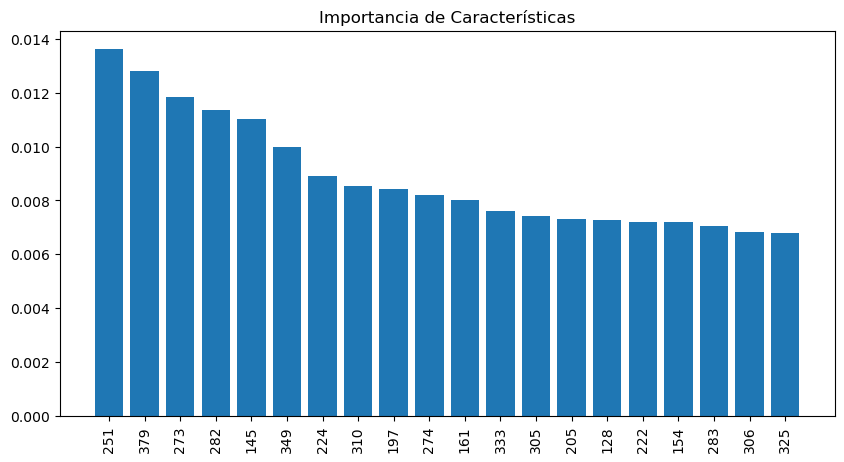

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Entrenar un modelo Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train_flattened, y_train_encoded)

# Obtener la importancia de características
importances = clf_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Graficar las 20 características más importantes
plt.figure(figsize=(10,5))
plt.title("Importancia de Características")
plt.bar(range(20), importances[indices[:20]], align="center")
plt.xticks(range(20), indices[:20], rotation=90)
plt.show()


C:\Users\LuchoPonce\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:28:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 XGBoost - Accuracy: 0.43
📌 XGBoost - F1 Score: 0.42


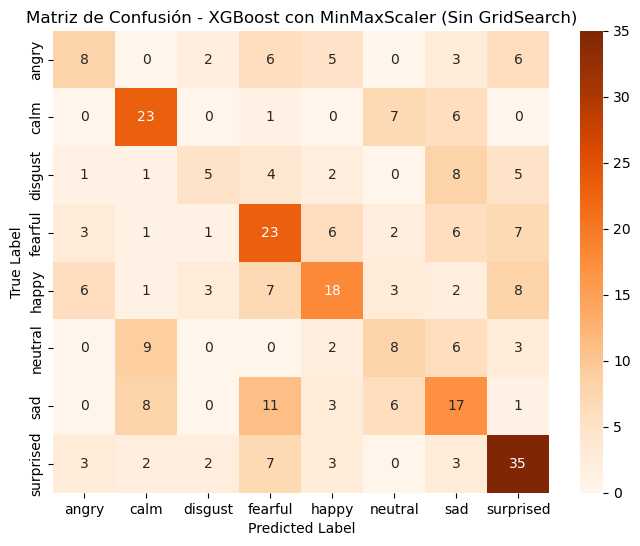

In [26]:
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ Eliminar columnas con demasiados ceros (más del 70%)
zero_threshold = 0.7  # 70% de valores en cero
cols_to_keep = np.mean(X_train_flattened == 0, axis=0) < zero_threshold

X_train_filtered = X_train_flattened[:, cols_to_keep]
X_test_filtered = X_test_flattened[:, cols_to_keep]

# 2️⃣ Aplicar MinMaxScaler para normalizar los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

# 3️⃣ Calcular `scale_pos_weight` para manejar clases desbalanceadas
class_counts = np.bincount(y_train_encoded)
scale_pos_weight = class_counts.min() / class_counts.max()

# 4️⃣ Definir modelo XGBoost sin optimización
clf_xgb = XGBClassifier(
    n_estimators=100,          # Número de árboles
    learning_rate=0.1,         # Tasa de aprendizaje
    max_depth=5,               # Profundidad de los árboles
    subsample=0.8,             # Usar 80% de los datos en cada árbol
    scale_pos_weight=scale_pos_weight,  # Balancear clases automáticamente
    use_label_encoder=False,  
    eval_metric="mlogloss",  
    random_state=42
)

# 5️⃣ Entrenar modelo
clf_xgb.fit(X_train_scaled, y_train_encoded)

# 6️⃣ Predicción en test
y_pred_xgb = clf_xgb.predict(X_test_scaled)

# 7️⃣ Calcular métricas
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
f1_xgb = f1_score(y_test_encoded, y_pred_xgb, average='weighted')

# 8️⃣ Crear matriz de confusión
conf_matrix_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)

# 9️⃣ Mostrar métricas
print(f"📌 XGBoost - Accuracy: {accuracy_xgb:.2f}")
print(f"📌 XGBoost - F1 Score: {f1_xgb:.2f}")

# 🔟 Graficar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Oranges", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusión - XGBoost con MinMaxScaler (Sin GridSearch)")
plt.show()


C:\Users\LuchoPonce\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:28:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 XGBoost - Accuracy: 0.43
📌 XGBoost - F1 Score: 0.42


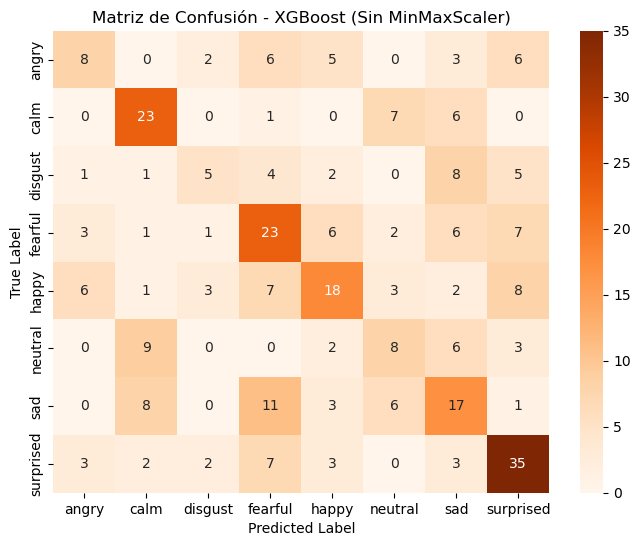

In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ Eliminar columnas con demasiados ceros (más del 70%)
zero_threshold = 0.7  # 70% de valores en cero
cols_to_keep = np.mean(X_train_flattened == 0, axis=0) < zero_threshold

X_train_filtered = X_train_flattened[:, cols_to_keep]
X_test_filtered = X_test_flattened[:, cols_to_keep]

# 2️⃣ Calcular `scale_pos_weight` para manejar clases desbalanceadas
class_counts = np.bincount(y_train_encoded)
scale_pos_weight = class_counts.min() / class_counts.max()

# 3️⃣ Definir modelo XGBoost sin escalar los datos
clf_xgb = XGBClassifier(
    n_estimators=100,          # Número de árboles
    learning_rate=0.1,         # Tasa de aprendizaje
    max_depth=5,               # Profundidad de los árboles
    subsample=0.8,             # Usar 80% de los datos en cada árbol
    scale_pos_weight=scale_pos_weight,  # Balancear clases automáticamente
    use_label_encoder=False,  
    eval_metric="mlogloss",  
    random_state=42
)

# 4️⃣ Entrenar modelo
clf_xgb.fit(X_train_filtered, y_train_encoded)

# 5️⃣ Predicción en test
y_pred_xgb = clf_xgb.predict(X_test_filtered)

# 6️⃣ Calcular métricas
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
f1_xgb = f1_score(y_test_encoded, y_pred_xgb, average='weighted')

# 7️⃣ Crear matriz de confusión
conf_matrix_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)

# 8️⃣ Mostrar métricas
print(f"📌 XGBoost - Accuracy: {accuracy_xgb:.2f}")
print(f"📌 XGBoost - F1 Score: {f1_xgb:.2f}")

# 🔟 Graficar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Oranges", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusión - XGBoost (Sin MinMaxScaler)")
plt.show()


Nueva forma de X_train después de PCA: (735, 60)


C:\Users\LuchoPonce\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:31:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 XGBoost con PCA - Accuracy: 0.43
📌 XGBoost con PCA - F1 Score: 0.42


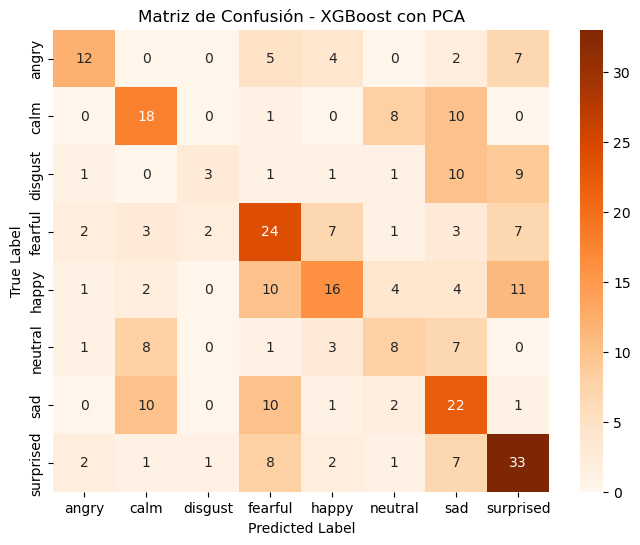

In [31]:
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ Eliminar columnas con demasiados ceros (más del 70%)
zero_threshold = 0.7  # 70% de valores en cero
cols_to_keep = np.mean(X_train_flattened == 0, axis=0) < zero_threshold

X_train_filtered = X_train_flattened[:, cols_to_keep]
X_test_filtered = X_test_flattened[:, cols_to_keep]

# 2️⃣ Aplicar PCA para reducir a 50 dimensiones
pca = PCA(n_components=60)  # Puedes probar con 100 si lo prefieres
X_train_pca = pca.fit_transform(X_train_filtered)
X_test_pca = pca.transform(X_test_filtered)

print("Nueva forma de X_train después de PCA:", X_train_pca.shape)

# 3️⃣ Calcular `scale_pos_weight` para manejar clases desbalanceadas
class_counts = np.bincount(y_train_encoded)
scale_pos_weight = class_counts.min() / class_counts.max()

# 4️⃣ Definir modelo XGBoost
clf_xgb = XGBClassifier(
    n_estimators=100,          # Número de árboles
    learning_rate=0.1,         # Tasa de aprendizaje
    max_depth=5,               # Profundidad de los árboles
    subsample=0.8,             # Usar 80% de los datos en cada árbol
    scale_pos_weight=scale_pos_weight,  # Balancear clases automáticamente
    use_label_encoder=False,  
    eval_metric="mlogloss",  
    random_state=42
)

# 5️⃣ Entrenar modelo con datos reducidos por PCA
clf_xgb.fit(X_train_pca, y_train_encoded)

# 6️⃣ Predicción en test
y_pred_xgb = clf_xgb.predict(X_test_pca)

# 7️⃣ Calcular métricas
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
f1_xgb = f1_score(y_test_encoded, y_pred_xgb, average='weighted')

# 8️⃣ Crear matriz de confusión
conf_matrix_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)

# 9️⃣ Mostrar métricas
print(f"📌 XGBoost con PCA - Accuracy: {accuracy_xgb:.2f}")
print(f"📌 XGBoost con PCA - F1 Score: {f1_xgb:.2f}")

# 🔟 Graficar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Oranges", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusión - XGBoost con PCA")
plt.show()


📌 Pesos calculados para cada clase: [1.3125, 1.09375, 1.53125, 0.805921052631579, 0.8352272727272727, 1.4134615384615385, 0.8667452830188679, 0.7291666666666666]
0:	learn: 2.0470317	total: 201ms	remaining: 1m 40s
100:	learn: 0.6942601	total: 4.16s	remaining: 16.4s
200:	learn: 0.3701824	total: 8.18s	remaining: 12.2s
300:	learn: 0.2349113	total: 12.1s	remaining: 8s
400:	learn: 0.1651618	total: 16s	remaining: 3.96s
499:	learn: 0.1224496	total: 20s	remaining: 0us
📌 CatBoost - Accuracy: 0.46
📌 CatBoost - F1 Score: 0.46


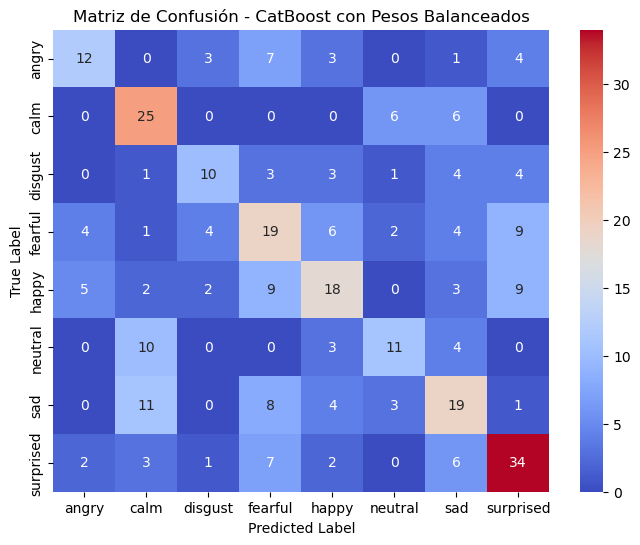

In [35]:
from catboost import CatBoostClassifier
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# 1️⃣ Calcular pesos de las clases
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train_encoded), y=y_train_encoded)
class_weights = class_weights.tolist()  # Convertir a lista

print(f"📌 Pesos calculados para cada clase: {class_weights}")

# 2️⃣ Definir modelo CatBoost con pesos corregidos
clf_catboost = CatBoostClassifier(
    iterations=500,  # Número de árboles
    depth=6,  # Profundidad del árbol
    learning_rate=0.1,  # Tasa de aprendizaje
    loss_function="MultiClass",  # Clasificación multiclase
    class_weights=class_weights,  # Pasamos la lista de pesos
    random_seed=42,
    verbose=100
)

# 3️⃣ Entrenar modelo
clf_catboost.fit(X_train_filtered, y_train_encoded)

# 4️⃣ Predicción en test
y_pred_catboost = clf_catboost.predict(X_test_filtered)

# 5️⃣ Calcular métricas
accuracy_catboost = accuracy_score(y_test_encoded, y_pred_catboost)
f1_catboost = f1_score(y_test_encoded, y_pred_catboost, average='weighted')

# 6️⃣ Crear matriz de confusión
conf_matrix_catboost = confusion_matrix(y_test_encoded, y_pred_catboost)

# 7️⃣ Mostrar métricas
print(f"📌 CatBoost - Accuracy: {accuracy_catboost:.2f}")
print(f"📌 CatBoost - F1 Score: {f1_catboost:.2f}")

# 🔟 Graficar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_catboost, annot=True, fmt="d", cmap="coolwarm", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusión - CatBoost con Pesos Balanceados")
plt.show()


C:\Users\LuchoPonce\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.47679 | val_0_accuracy: 0.14734 |  0:00:00s
epoch 1  | loss: 2.3267  | val_0_accuracy: 0.1442  |  0:00:00s
epoch 2  | loss: 2.18469 | val_0_accuracy: 0.1442  |  0:00:00s
epoch 3  | loss: 2.11921 | val_0_accuracy: 0.1442  |  0:00:00s
epoch 4  | loss: 2.09867 | val_0_accuracy: 0.1442  |  0:00:00s
epoch 5  | loss: 2.06201 | val_0_accuracy: 0.12853 |  0:00:00s
epoch 6  | loss: 2.04765 | val_0_accuracy: 0.12226 |  0:00:00s
epoch 7  | loss: 2.04091 | val_0_accuracy: 0.12539 |  0:00:00s
epoch 8  | loss: 1.99945 | val_0_accuracy: 0.13166 |  0:00:01s
epoch 9  | loss: 2.01403 | val_0_accuracy: 0.14107 |  0:00:01s
epoch 10 | loss: 1.96031 | val_0_accuracy: 0.1442  |  0:00:01s
epoch 11 | loss: 1.9422  | val_0_accuracy: 0.1442  |  0:00:01s
epoch 12 | loss: 1.95426 | val_0_accuracy: 0.1442  |  0:00:01s
epoch 13 | loss: 1.89071 | val_0_accuracy: 0.1442  |  0:00:01s
epoch 14 | loss: 1.89544 | val_0_accuracy: 0.1442  |  0:00:01s
epoch 15 | loss: 1.8652  | val_0_accuracy: 0.1442  |  0

C:\Users\LuchoPonce\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\LuchoPonce\anaconda3\Lib\site-packages\torch\utils\data\_utils\collate.py:285: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_numpy.cpp:212.)
  return collate([torch.as_tensor(b) for b in batch], collate_fn_map=collate_fn_map)


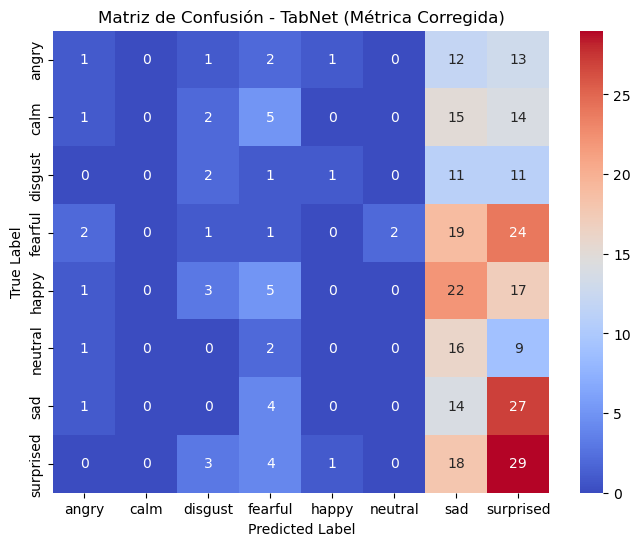

In [39]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Definir modelo TabNet con métrica corregida
clf_tabnet = TabNetClassifier(
    optimizer_fn=torch.optim.Adam,  
    optimizer_params=dict(lr=2e-2),  # Ajusta la tasa de aprendizaje
    scheduler_params={"step_size":10, "gamma":0.9},  # Programador de tasa de aprendizaje
    scheduler_fn=torch.optim.lr_scheduler.StepLR,  
    mask_type="entmax",  # Tipo de atención
    seed=42
)

# 2️⃣ Entrenar modelo TabNet con `balanced_accuracy`
clf_tabnet.fit(
    X_train_filtered, y_train_encoded,
    eval_set=[(X_test_filtered, y_test_encoded)],
    eval_metric=["accuracy"],  # Usamos accuracy en lugar de f1_weighted
    max_epochs=200,  # Número de épocas
    patience=20,  # Early stopping si no mejora
    batch_size=256,
    num_workers=0
)

# 3️⃣ Predicción
y_pred_tabnet = clf_tabnet.predict(X_test_filtered)

# 4️⃣ Calcular métricas
accuracy_tabnet = accuracy_score(y_test_encoded, y_pred_tabnet)
f1_tabnet = f1_score(y_test_encoded, y_pred_tabnet, average='weighted')

# 5️⃣ Crear matriz de confusión
conf_matrix_tabnet = confusion_matrix(y_test_encoded, y_pred_tabnet)

# 6️⃣ Mostrar métricas corregidas
print(f"📌 TabNet - Accuracy: {accuracy_tabnet:.2f}")
print(f"📌 TabNet - F1 Score: {f1_tabnet:.2f}")

# 7️⃣ Graficar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tabnet, annot=True, fmt="d", cmap="coolwarm", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusión - TabNet (Métrica Corregida)")
plt.show()


In [45]:
from deepctr.models import DeepFM
from deepctr.feature_column import SparseFeat, DenseFeat, get_feature_names
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Crear columnas de características
sparse_features = ["label"]  # Si tienes variables categóricas
dense_features = [f"feature_{i}" for i in range(X_train_filtered.shape[1])]  # Variables numéricas

# Normalizar datos
X_train_df = pd.DataFrame(X_train_filtered, columns=dense_features)
X_test_df = pd.DataFrame(X_test_filtered, columns=dense_features)

# Definir características
feature_columns = [DenseFeat(feat, 1) for feat in dense_features] + [SparseFeat(feat, vocabulary_size=X_train_df[feat].nunique(), embedding_dim=4) for feat in sparse_features]
feature_names = get_feature_names(feature_columns)

# Preparar datos de entrada
train_model_input = {name: X_train_df[name].values for name in feature_names}
test_model_input = {name: X_test_df[name].values for name in feature_names}

# Definir modelo DeepFM
clf_deepfm = DeepFM(feature_columns, feature_columns, task="multi-class", num_class=len(np.unique(y_train_encoded)))

# Compilar modelo
clf_deepfm.compile("adam", "sparse_categorical_crossentropy", metrics=['accuracy'])

# Entrenar
clf_deepfm.fit(train_model_input, y_train_encoded, batch_size=256, epochs=10, verbose=2)

# Predicción
y_pred_deepfm = clf_deepfm.predict(test_model_input).argmax(axis=1)

# Calcular métricas
accuracy_deepfm = accuracy_score(y_test_encoded, y_pred_deepfm)
f1_deepfm = f1_score(y_test_encoded, y_pred_deepfm, average='weighted')

# Mostrar métricas
print(f"📌 DeepFM - Accuracy: {accuracy_deepfm:.2f}")
print(f"📌 DeepFM - F1 Score: {f1_deepfm:.2f}")


ModuleNotFoundError: No module named 'deepctr'